In [40]:
%matplotlib inline

import dfmaker
import modelmaker
import AnaFunc

reload(dfmaker)
reload(modelmaker)
reload(AnaFunc)

import time

from sklearn import cross_validation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

import numpy as np
import re

import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import metrics

In [57]:
def DrawROCandThreshLog(y_test,result_prob,title):
       
    plt.rcParams['figure.figsize'] = (8.0, 6.0)
    plt.rcParams['font.size'] =  15    
        
    y_real = y_test
    y_score = result_prob

          
        
    #print y_real.shape
    #print y_score.shape
    fpr, tpr, thresh = metrics.roc_curve(y_real, y_score, pos_label=1)
        
    roc_auc = metrics.auc(fpr, tpr,reorder=True)
    
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("Cut Threshold versus Selection Rate: %s" % title)
    plt.legend(loc="lower right")
    plt.show()
    
    plt.figure()
    plt.plot(thresh, tpr, label='True Positive Rate')
    plt.plot(thresh, fpr, label='False Positive Rate')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Threshold')
    plt.ylabel('Rate')
    plt.title('Cut Threshold versus Selection Rate: %s' % title)
    plt.legend(loc="upper right")
    plt.show()
    
    #return tpr, fpr, thresholds

In [13]:
myconfig = "/Users/ruthtoner/CodingMacros/ProjectInsight/myconfigs.cfg"

#Vectorizer:
vect_text = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 50, \
                             max_df = 1.0)

vect_tag = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 50, \
                             max_df = 1.0, \
                             binary = True)

In [14]:
def MakeNorms(df,v1,v2):
    
    x1,x2,y = modelmaker.retrieve_vocab(v1,v2,df)

    norm1 = np.zeros(x1.shape[0])
    for i,x in enumerate(x1):
        norm1[i] = np.linalg.norm(x)

    norm2 = np.zeros(x2.shape[0])
    for i,x in enumerate(x2):
        norm2[i] = np.linalg.norm(x)

    return norm1,norm2

In [15]:
def MakeFeatures(df,v1,v2):
    
    x1,x2,y = modelmaker.retrieve_vocab(v1,v2,df)

    norm1 = np.zeros(x1.shape[0])
    for i,x in enumerate(x1):
        norm1[i] = np.linalg.norm(x)

    norm2 = np.zeros(x1.shape[0])
    for i,x in enumerate(x2):
        norm2[i] = (np.linalg.norm(x))

    print norm1.shape, norm2.shape
        
    norm1 = norm1.reshape(len(norm1),1)
    norm2 = norm2.reshape(len(norm2),1)
    
    x = np.hstack([norm1,norm2])  
    
    print x.shape
    return x,y

In [21]:
def TrainLog(df_train,v1,v2):

    X_train,Y_train = MakeFeatures(df_train,v1,v2)

    logreg = linear_model.LogisticRegression(C=1)
    
    logreg.fit(X_train, Y_train)
    
    return logreg

In [ ]:
def TestLog(logreg,df_test,v1,v2):

    X_test,Y_test = MakeFeatures(df_test,v1,v2)

    results = logreg.predict_proba(X_test)[:,1]

    Y_test = Y_test.reshape(len(Y_test),1)
    
    return results,Y_test
    

In [ ]:
def TrainTestDraw(df_train,df_test,v1,v2,title):
    logreg = TrainLog(df_train,v1,v2)
    results,Y_test = TestLog(logreg,df_test,v1,v2)
    DrawROCandThreshLog(Y_test,results,title)

In [84]:
def snipstr(x,mystr):
    x = re.sub("\S*%s\S*" % mystr,"",x)
    return x

def remove_word(df,w):
    df['taglist'] = df['taglist'].apply(lambda x, y: snipstr(x,y), args=(w,))
    df['words'] = df['words'].apply(lambda x, y: snipstr(x,y), args=(w,))
    return df

In [60]:
nolist = ['dai','han']
df_total = dfmaker.get_nolist_dfs("sw",nolist,myconfig)

In [61]:
df_train,df_test = dfmaker.GenerateTestTrainFront(df_total,1)
_,_,_,v1,v2 = modelmaker.train_vocab(vect_text,vect_tag,df_train[df_train["evtclass"]==1],downsample=False)

(50781,) (50781,)
(50781, 2)
(51130,) (51130,)
(51130, 2)


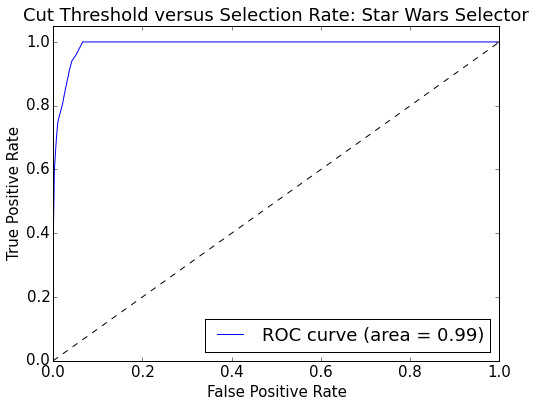

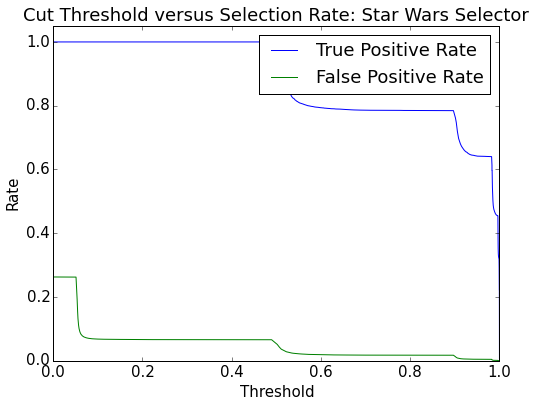

In [62]:
TrainTestDraw(df_train,df_test,v1,v2,"Star Wars Selector")

In [87]:
df_test_nosw = remove_word(df_test,"star")
df_test_nosw = remove_word(df_test,"war")

(50781,) (50781,)
(50781, 2)
(51130,) (51130,)
(51130, 2)


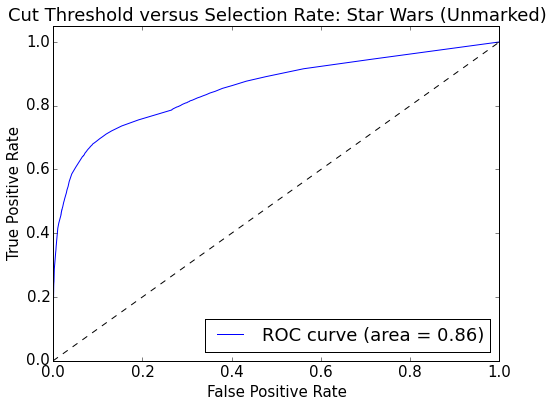

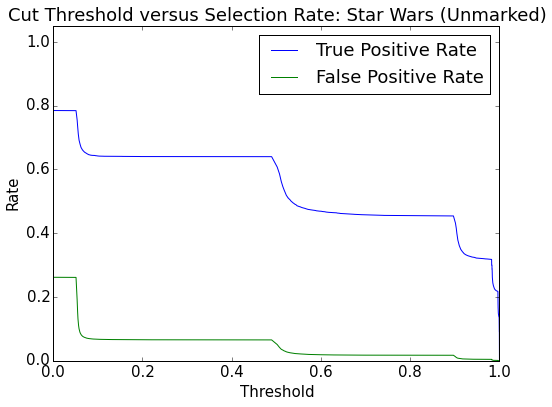

In [89]:
TrainTestDraw(df_train,df_test_nosw,v1,v2,"Star Wars (Unmarked)")

In [90]:
df_train,df_test = dfmaker.GenerateTestTrainFront(df_total,2)
_,_,_,v1,v2 = modelmaker.train_vocab(vect_text,vect_tag,df_train[df_train["evtclass"]==1],downsample=False)

(55503,) (55503,)
(55503, 2)
(46408,) (46408,)
(46408, 2)


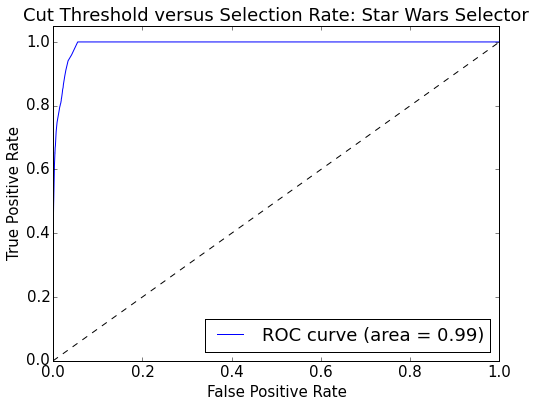

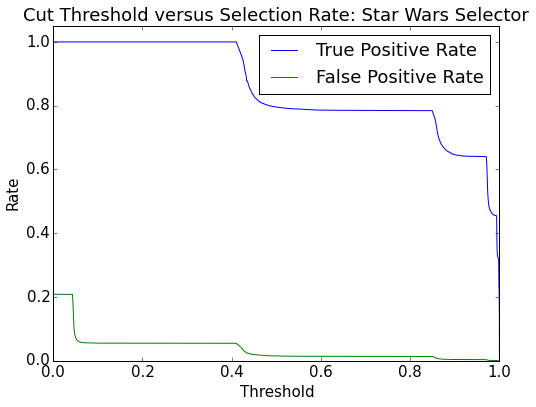

In [91]:
TrainTestDraw(df_train,df_test,v1,v2,"Star Wars Selector")

In [92]:
df_test_nosw = remove_word(df_test,"star")
df_test_nosw = remove_word(df_test,"war")

(55503,) (55503,)
(55503, 2)
(46408,) (46408,)
(46408, 2)


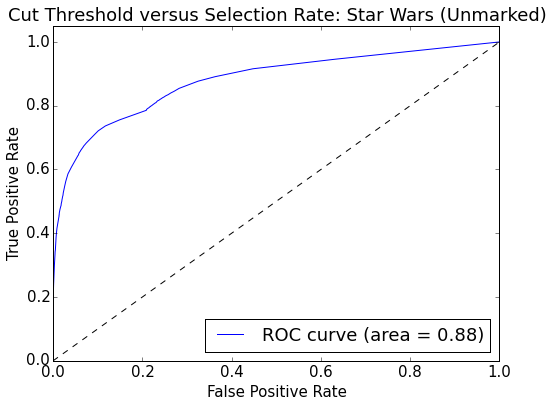

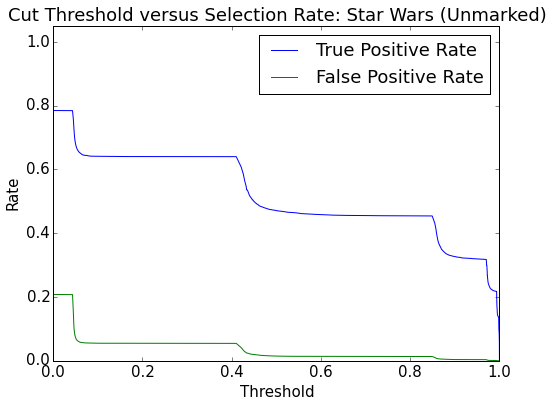

In [93]:
TrainTestDraw(df_train,df_test_nosw,v1,v2,"Star Wars (Unmarked)")